In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [4]:
os.chdir("C:\\Users\\Madhu Gupta\\Downloads\\Project")

In [6]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data['Age'].fillna(data['Age'].median(), inplace = True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

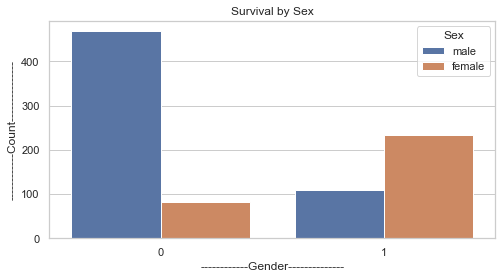

In [15]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x="Survived", hue="Sex")
plt.title("Survival by Sex")
plt.xlabel("------------Gender--------------")
plt.ylabel("------------Count---------------")
plt.legend(title="Sex", loc="upper right")
plt.show()
#Survival by Sex

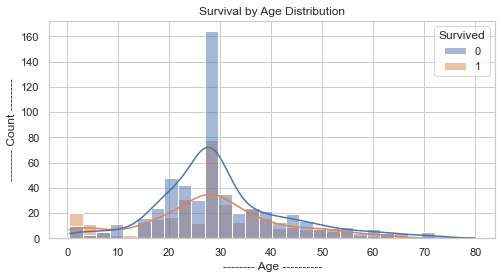

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='Age', hue='Survived', kde=True, common_norm=False)
plt.title("Survival by Age Distribution")
plt.xlabel("-------- Age ----------")
plt.ylabel("-------- Count --------")
plt.show()
#Passengers Age Distribution

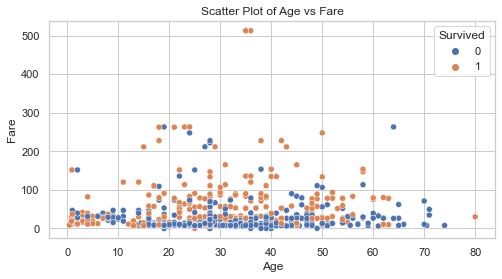

In [26]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x="Age", y="Fare", hue="Survived")
plt.title("Scatter Plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()
#age vs fare

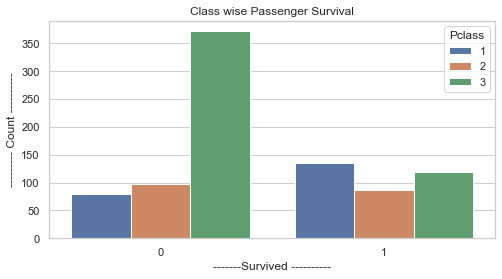

In [28]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x="Survived", hue="Pclass")
plt.title("Class wise Passenger Survival")
plt.xlabel("-------Survived ----------")
plt.ylabel("--------- Count ----------")
plt.show()
#survival vs class

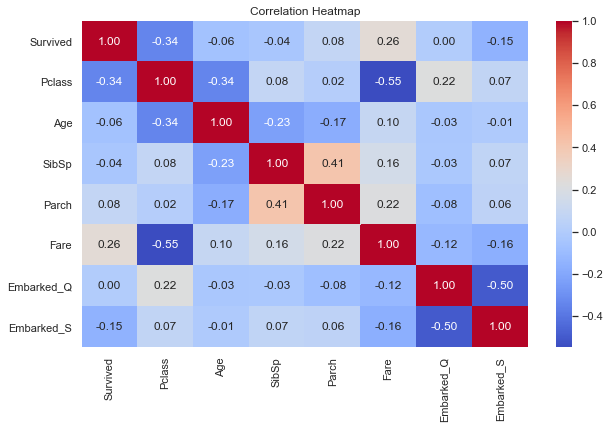

In [30]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
plt.figure(figsize=(10, 6))
correlation_matrix = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
#heatmap